In [1]:
import torch
from PIL import Image
from diffusers import StableDiffusionImg2ImgPipeline
from diffusers import DPMSolverMultistepScheduler 
from diffusers import DiffusionPipeline

Input Image Size:  (703, 463)


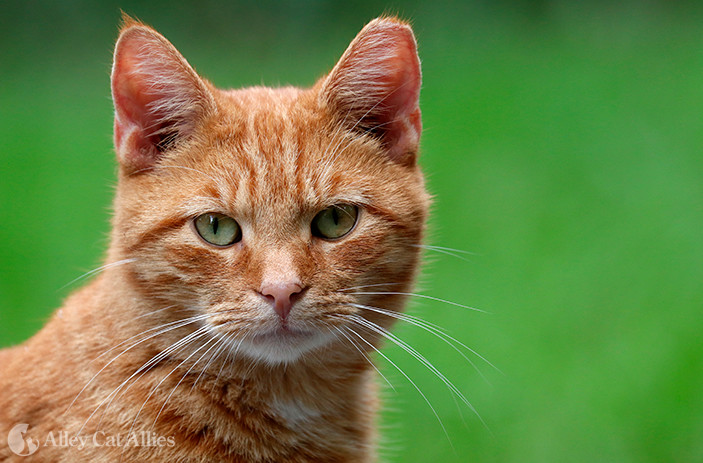

In [2]:
input_image_path = "../../../1_media/input_images/cat.jpg"
input_image = Image.open(input_image_path)
print("Input Image Size: ", input_image.size)
display(input_image)

# FP32

In [3]:
pipe = StableDiffusionImg2ImgPipeline.from_pretrained("SimianLuo/LCM_Dreamshaper_v7")
pipe.to("cuda", torch.float32)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionImg2ImgPipeline {
  "_class_name": "StableDiffusionImg2ImgPipeline",
  "_diffusers_version": "0.29.2",
  "_name_or_path": "SimianLuo/LCM_Dreamshaper_v7",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "LCMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

/home/server/.local/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


  0%|          | 0/35 [00:00<?, ?it/s]

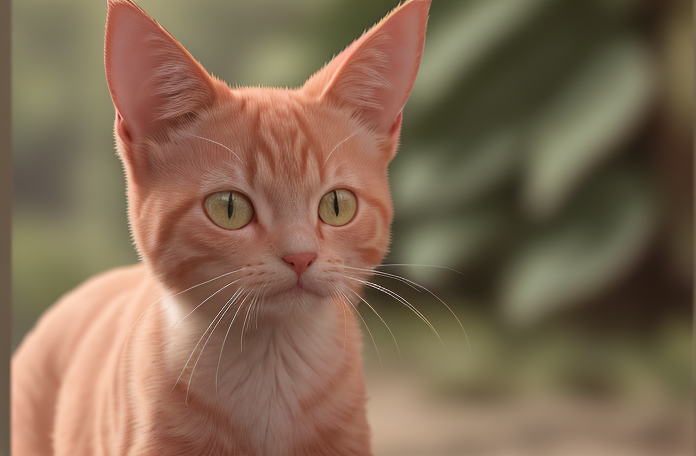

In [4]:
generator = torch.Generator().manual_seed(40)
out_fp32 = pipe(prompt= "a beautiful pink cat",
                image=input_image,
                num_inference_steps=50,
                guidance_scale=8.0,
                strength=0.7,
                generator=generator
                ).images[0]

display(out_fp32)

# FP16

In [5]:
pipe_fp16 = StableDiffusionImg2ImgPipeline.from_pretrained("SimianLuo/LCM_Dreamshaper_v7")
pipe_fp16 = pipe_fp16.to("cuda", torch.float16)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

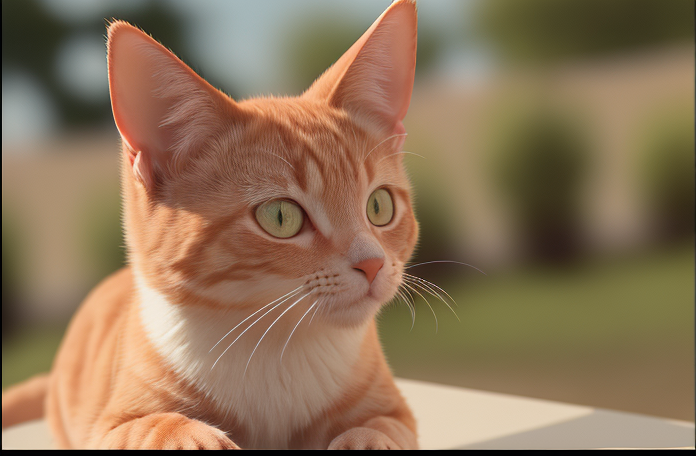

In [6]:
generator = torch.Generator().manual_seed(40)
out_fp16 = pipe_fp16(prompt= "a beautiful pink cat",
                     image=input_image,
                     num_inference_steps=50,
                     strength=0.7,
                     guidance_scale=8.0,
                     generator=generator
                     ).images[0]

display(out_fp16)